<a href="https://colab.research.google.com/github/AlexanderVieira/training_datascience/blob/main/TemperaturesByMajorCity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
def plot_series(series):
    sns.set_context("talk")
    sns.set_style("ticks")

    fig, ax = plt.subplots(1, 1, figsize=(28, 5))
    ax = series.plot(ax = ax)
    ax.yaxis.grid(True)
    sns.despine(offset=10, trim=True)
    return ax

In [4]:
serie = pd.read_csv('/content/GlobalLandTemperaturesByMajorCity.csv.zip')

In [74]:
serie.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [50]:
countries = pd.unique(serie['Country']).tolist()

In [51]:
countries

["Côte D'Ivoire",
 'Ethiopia',
 'India',
 'Syria',
 'Egypt',
 'Turkey',
 'Iraq',
 'Thailand',
 'Brazil',
 'Germany',
 'Colombia',
 'South Africa',
 'Morocco',
 'China',
 'United States',
 'Senegal',
 'Tanzania',
 'Bangladesh',
 'Pakistan',
 'Zimbabwe',
 'Vietnam',
 'Nigeria',
 'Indonesia',
 'Saudi Arabia',
 'Afghanistan',
 'Ukraine',
 'Congo (Democratic Republic Of The)',
 'Peru',
 'United Kingdom',
 'Angola',
 'Spain',
 'Philippines',
 'Iran',
 'Australia',
 'Mexico',
 'Somalia',
 'Canada',
 'Russia',
 'Japan',
 'Kenya',
 'France',
 'Burma',
 'Italy',
 'Chile',
 'Dominican Republic',
 'South Korea',
 'Singapore',
 'Taiwan',
 'Sudan']

In [53]:
count_countries = len(countries)
count_countries

49

In [18]:
serie_brazil = serie[serie.Country == 'Brazil']

In [19]:
serie_brazil.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
22319,1832-01-01,22.516,1.556,Belo Horizonte,Brazil,20.09S,44.36W
22320,1832-02-01,23.198,3.471,Belo Horizonte,Brazil,20.09S,44.36W
22321,1832-03-01,22.188,1.667,Belo Horizonte,Brazil,20.09S,44.36W
22322,1832-04-01,20.045,2.743,Belo Horizonte,Brazil,20.09S,44.36W
22323,1832-05-01,18.500,2.253,Belo Horizonte,Brazil,20.09S,44.36W


In [ ]:
serie_brazil['dt'] = pd.to_datetime(serie_brazil.dt)

In [61]:
serie_brazil.set_index('dt', inplace=True)

In [75]:
serie_mean_cities = serie_brazil.groupby('City')['AverageTemperature'].mean()
serie_mean_cities

City
Belo Horizonte    21.071396
Brasília          21.727595
Fortaleza         27.008640
Rio De Janeiro    23.788916
Salvador          24.656971
São Paulo         19.699368
Name: AverageTemperature, dtype: float64

In [80]:
serie_fortaleza = serie_brazil[serie_brazil.City == 'Fortaleza']
serie_fortaleza.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1845-01-01,27.354,1.659,Fortaleza,Brazil,4.02S,40.98W
1845-02-01,25.386,2.461,Fortaleza,Brazil,4.02S,40.98W
1845-03-01,25.432,1.412,Fortaleza,Brazil,4.02S,40.98W
1845-04-01,25.182,1.433,Fortaleza,Brazil,4.02S,40.98W
1845-05-01,25.068,1.529,Fortaleza,Brazil,4.02S,40.98W


In [81]:
serie_fortaleza.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,1659.000000,1659.000000
mean,27.008640,0.775052
std,1.182188,0.485451
min,24.274000,0.150000
25%,26.051500,0.422500
50%,27.006000,0.598000
75%,27.936500,1.046500
max,29.986000,3.492000


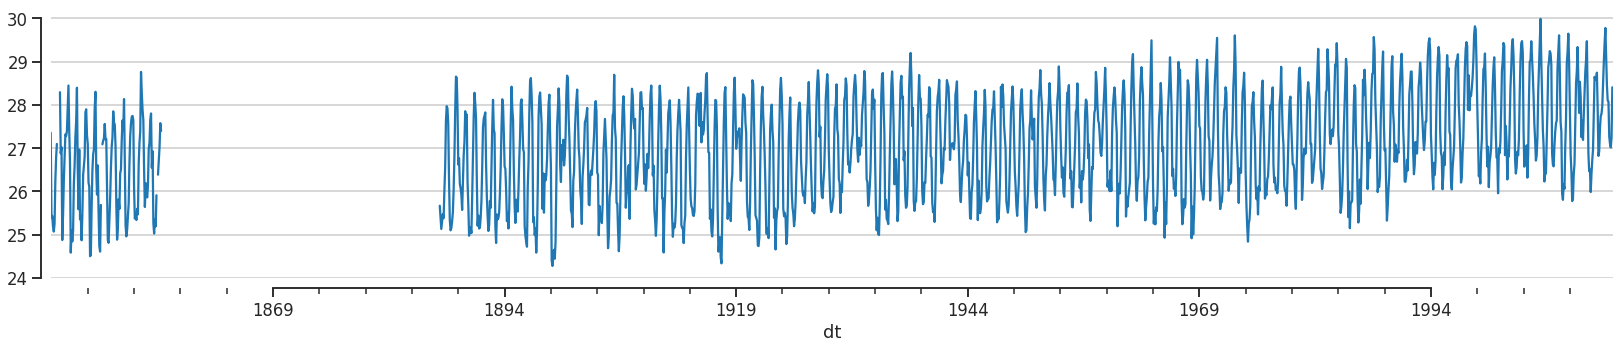

In [89]:
ax = plot_series(serie_fortaleza.AverageTemperature)

In [90]:
states = pd.unique(serie_brazil['City']).tolist()
states

['Belo Horizonte',
 'Brasília',
 'Fortaleza',
 'Rio De Janeiro',
 'São Paulo',
 'Salvador']

In [91]:
count_states = len(states)
print('Total de Estados Brasileiros na base de dados:',count_states)

Total de Estados Brasileiros na base de dados: 6


In [106]:
dados = serie_brazil.groupby('City')['City'].agg(["count"])
dados

,count
City,
Belo Horizonte,2181
Brasília,2181
Fortaleza,2025
Rio De Janeiro,2181
Salvador,2181
São Paulo,2181
